# CSCI 6515 - Assignment 2

In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [645]:
dataset = pd.read_csv("heart.csv", sep =",")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [646]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [647]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [648]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [649]:
X = dataset.drop(["target"], axis = 1)
Y = dataset["target"]

In [650]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

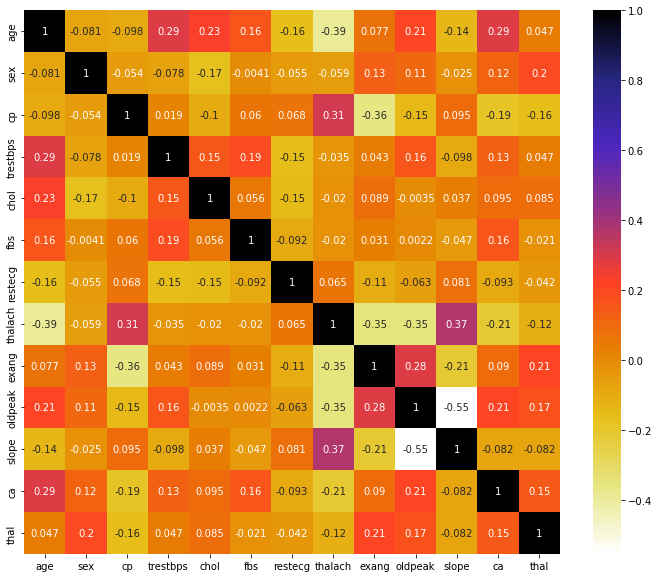

In [651]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [652]:
def correlation_features(dataset, threshold):
    columns_corr = set()  
    cor_mat = dataset.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i, j]) > threshold:
                colname = cor_mat.columns[i]  
                columns_corr.add(colname)
    return columns_corr

In [653]:
corr_features = correlation_features(X_train, 0.8)
len(corr_features)

0

In [654]:
final_dataset = dataset
final_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [655]:
final_dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [800]:
final_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='trestbps', ylabel='age'>

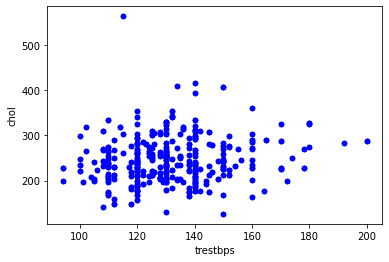

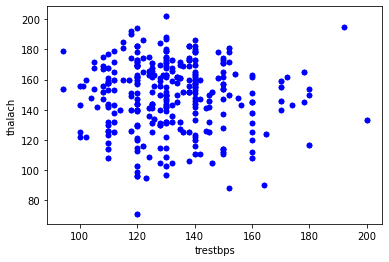

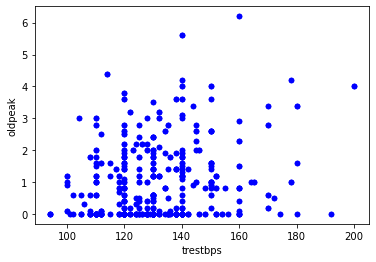

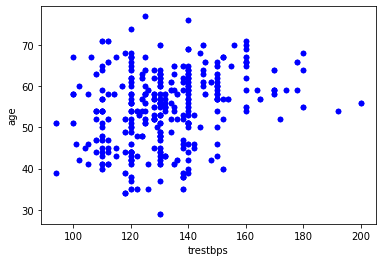

In [656]:
#scatter plot to check the linearity of the dataset 
final_dataset.plot.scatter(x='trestbps', y='chol', c='b')
final_dataset.plot.scatter(x='trestbps', y='thalach', c='b')
final_dataset.plot.scatter(x='trestbps', y='oldpeak', c='b')
final_dataset.plot.scatter(x='trestbps', y='age', c='b')

In [657]:
final_dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [658]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [659]:
clustering_dataset = final_dataset.drop(["target"], axis =1)
clustering_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [660]:
cols = clustering_dataset.columns 
#cols

# K Means Clustering

In [661]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_dataset = scaler.fit_transform(clustering_dataset)

In [662]:
clustering_dataset = pd.DataFrame(clustering_dataset, columns = [cols])
clustering_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [663]:
clustering_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (age,)       1025 non-null   float64
 1   (sex,)       1025 non-null   float64
 2   (cp,)        1025 non-null   float64
 3   (trestbps,)  1025 non-null   float64
 4   (chol,)      1025 non-null   float64
 5   (fbs,)       1025 non-null   float64
 6   (restecg,)   1025 non-null   float64
 7   (thalach,)   1025 non-null   float64
 8   (exang,)     1025 non-null   float64
 9   (oldpeak,)   1025 non-null   float64
 10  (slope,)     1025 non-null   float64
 11  (ca,)        1025 non-null   float64
 12  (thal,)      1025 non-null   float64
dtypes: float64(13)
memory usage: 104.2 KB


In [664]:
X = clustering_dataset.iloc[:, :].values
X

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [665]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [666]:
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [667]:
silhouette_score(X, kmeans.labels_)

0.1300985532372137

In [668]:
kmeans_per_k = [KMeans(init = "k-means++", n_clusters = k, random_state=42).fit(X) for k in range(1,11)]

silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]

silhouette_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[0.1700813691485787,
 0.12381450469263082,
 0.1321750438629156,
 0.13041369796583743,
 0.12012371629555761,
 0.1183363929017515,
 0.1304428912155277,
 0.12731265527562563,
 0.1300985532372137]

In [669]:
highest_sil = max(silhouette_scores)
highest_sil

0.1700813691485787

In [670]:
clustered_df = pd.DataFrame({'Silhouette Scores':silhouette_scores})

In [671]:
clustered_df["Cluster"] = range(2,11)
clustered_df.set_index("Cluster")

,Silhouette Scores
Cluster,
2,0.170081
3,0.123815
4,0.132175
5,0.130414
6,0.120124
7,0.118336
8,0.130443
9,0.127313
10,0.130099


No handles with labels found to put in legend.


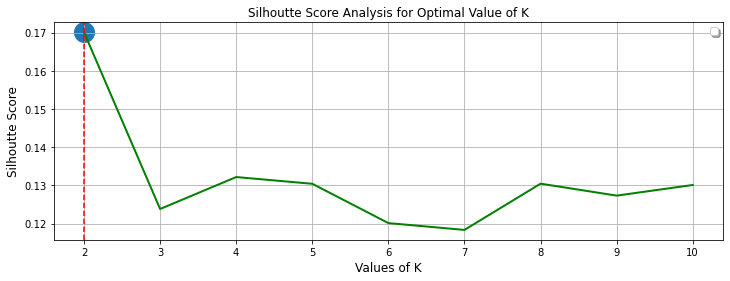

In [672]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(range(2,11), silhouette_scores, color = "green", linewidth = 2)
plt.xlabel("Values of K", fontsize = 12)
plt.ylabel("Silhoutte Score", fontsize = 12)
plt.grid()
plt.title("Silhoutte Score Analysis for Optimal Value of K")

k = np.argmax(silhouette_scores) + 2

plt.axvline(x=k, linestyle ="--",c="red")

plt.scatter(k, silhouette_scores[k-2], s=400)
plt.legend(shadow=True)
plt.show()

In [673]:
print("The optimal Value of K is {}".format(k))

The optimal Value of K is 2


In [674]:
k_means = KMeans (n_clusters = 2)

In [675]:
label = k_means.fit_predict(X)

In [676]:
clustering_dataset["Cluster"] = label
clustering_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,1
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,1
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,0
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,1
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,1
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,0


In [681]:
clustering_dataset1 = clustering_dataset
clustering_dataset1.columns = clustering_dataset1.columns.get_level_values(0)

In [682]:
clus_results = clustering_dataset1.groupby(["Cluster"]).mean()
clus_results.abs()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Cluster,,,,,,,,,,,,,
0,0.245131,0.083977,0.393715,0.124505,0.073648,0.040706,0.066958,0.481536,0.456267,0.415938,0.377870,0.314303,0.228363
1,0.430297,0.147411,0.691118,0.218553,0.129281,0.071454,0.117536,0.845277,0.800921,0.730127,0.663304,0.551720,0.400863


In [683]:
clustering_dataset['Cluster'].value_counts()

0    653
1    372
Name: Cluster, dtype: int64

In [684]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [685]:
pca.explained_variance_ratio_

array([0.21369911, 0.11971956])

In [686]:
pca.transform(X)

array([[-0.52253834, -1.11273256],
       [ 2.5902992 , -0.53346281],
       [ 3.04225226, -1.32783423],
       ...,
       [ 1.2450846 , -1.45731794],
       [-1.62003215,  0.12450307],
       [ 0.93423115, -1.77834406]])

In [687]:
scores_pca = pca.transform(X)
scores_pca

array([[-0.52253834, -1.11273256],
       [ 2.5902992 , -0.53346281],
       [ 3.04225226, -1.32783423],
       ...,
       [ 1.2450846 , -1.45731794],
       [-1.62003215,  0.12450307],
       [ 0.93423115, -1.77834406]])

In [688]:
k_means = KMeans(init = "k-means++", n_clusters = 2, random_state = 42)
k_means.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [689]:
clustered_dataset_ = dataset.drop(["target"], axis =1)
clustered_dataset_ = pd.concat([dataset.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
clustered_dataset_.columns.values[-2: ] = ["Component 1", "Component 2"]
clustered_dataset_["Clustered Label"] = k_means.labels_

In [690]:
clustered_dataset_

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Component 1,Component 2,Clustered Label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.522538,-1.112733,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2.590299,-0.533463,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3.042252,-1.327834,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,-0.492532,-0.276730,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.187537,1.951687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,-0.762392,-0.512495,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,2.374266,-0.940875,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,1.245085,-1.457318,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,-1.620032,0.124503,0


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

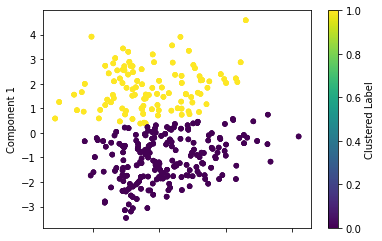

In [691]:
clustered_dataset_.plot.scatter(x="Component 2", y="Component 1", c = 'Clustered Label', colormap='viridis')

In [692]:
final_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [693]:
dataset_label = pd.DataFrame(final_dataset["target"])
dataset_label.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [694]:
#Generated clustered labels 
clus_label =pd.DataFrame(clustering_dataset["Cluster"]) 
clus_label.head(10)

,Cluster
0,0
1,1
2,1
3,0
4,1
5,0
6,1
7,1
8,0
9,1


In [746]:
labels_true = final_dataset["target"].values.tolist()
#labels_true

In [747]:
labels_pred = clustering_dataset["Cluster"].values.tolist()
#labels_pred

In [748]:
#Converting the 2D list to 1D shape
#labels_pred_ = clustering_dataset["Cluster"].values.tolist()
#labels_pred = sum(labels_pred_, [])
#labels_pred

In [749]:
#Calculating the Rand Index between Clustered Labels and the Initial Labels of the dataset
from sklearn.metrics.cluster import adjusted_rand_score
print("The Adjusted Rand Index is:", adjusted_rand_score(labels_true, labels_pred))

The Adjusted Rand Index is: 0.36409106000433716


# Decision Tree Classifier

In [750]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [751]:
dataset_cols=final_dataset.columns
dataset_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [752]:
scaler = StandardScaler()
#final_dataset = scaler.fit_transform(final_dataset)
#final_dataset

In [753]:
final_dataset = pd.DataFrame(final_dataset, columns = dataset_cols)
final_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [754]:
#feature_cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", 
                #"oldpeak", "slope", "ca", "thal"]

In [755]:
# Decision Tree Classifier

In [756]:
X = final_dataset.iloc[:,0:13]
Y = final_dataset["target"]

In [757]:
DTscaler = StandardScaler()
X = DTscaler.fit_transform(X)

In [758]:
#X = scaler.fit_transform(final_dataset.values[:,0:13])
#Y = final_dataset.values[:,13]

In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [760]:
clf_DT = DecisionTreeClassifier()
clf_DT = clf_DT.fit(X_train, y_train)

In [761]:
y_trainpred = clf_DT.predict(X_train)

In [762]:
y_testpred = clf_DT.predict(X_test)

In [763]:
from sklearn import metrics

#Acuracy of Training
print("Training Accuracy of Decision Tree: ",metrics.accuracy_score(y_train, y_trainpred)*100)

Training Accuracy of Decision Tree:  100.0


In [764]:
#Acuracy of Testing 
print("Testing Accuracy of Decision Tree: ",metrics.accuracy_score(y_test, y_testpred)*100)

Testing Accuracy of Decision Tree:  98.53658536585365


In [765]:
print("Training Confusion Matrix: \n", confusion_matrix(y_train, y_trainpred))

Training Confusion Matrix: 
 [[397   0]
 [  0 423]]


In [766]:
print("Testing Confusion Matrix: \n", confusion_matrix(y_test, y_testpred))

Testing Confusion Matrix: 
 [[102   0]
 [  3 100]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree (Training Data)')

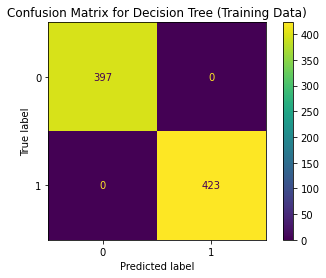

In [767]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_trainpred), clf_DT.classes_).plot()
disp.ax_.set_title("Confusion Matrix for Decision Tree (Training Data)")

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree (Testing Data)')

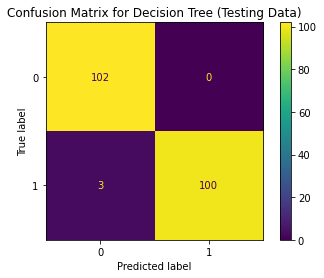

In [768]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_testpred), clf_DT.classes_).plot()
disp.ax_.set_title("Confusion Matrix for Decision Tree (Testing Data)")

In [769]:
#Classification Report of Training 
print(classification_report(y_train, y_trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       423

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [770]:
#Classification Report of Testing 
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Naive Bayes Classifier

In [771]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [772]:
X = final_dataset.iloc[:, 0:13]
Y = final_dataset["target"]

In [773]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [774]:
NBscaler = StandardScaler()
X = scaler.fit_transform(X)

In [775]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [776]:
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X_train, y_train)

In [777]:
y_trainpred_NB = clf_NB.predict(X_train)

In [778]:
y_testpred_NB = clf_NB.predict(X_test)

In [779]:
print("Training Accuracy of Naive Bayes: ",metrics.accuracy_score(y_train, y_trainpred_NB)*100)

Training Accuracy of Naive Bayes:  83.90243902439025


In [780]:
#Acuracy of Testing 
print("Testing Accuracy of Naive Bayes:: ",metrics.accuracy_score(y_test, y_testpred_NB)*100)

Testing Accuracy of Naive Bayes::  80.0


In [781]:
print("Training Confusion Matrix: \n", confusion_matrix(y_train, y_trainpred_NB))

Training Confusion Matrix: 
 [[320  77]
 [ 55 368]]


In [782]:
print("Testing Confusion Matrix: \n", confusion_matrix(y_test, y_testpred_NB))

Testing Confusion Matrix: 
 [[72 30]
 [11 92]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Confusion Matrix for Naïve Bayes (Training Data)')

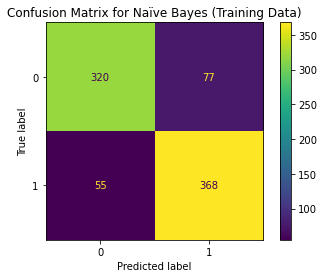

In [783]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_trainpred_NB), clf_NB.classes_).plot()
disp.ax_.set_title("Confusion Matrix for Naïve Bayes (Training Data)")

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Confusion Matrix for Naïve Bayes (Testing Data)')

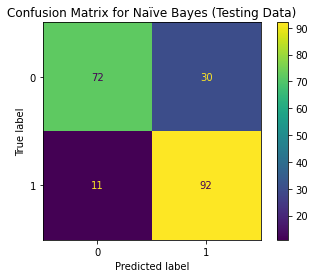

In [784]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_testpred_NB), clf_NB.classes_).plot()
disp.ax_.set_title("Confusion Matrix for Naïve Bayes (Testing Data)")

In [785]:
#Classification Report of Training 
print(classification_report(y_train, y_trainpred_NB))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       397
           1       0.83      0.87      0.85       423

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



In [786]:
#Classification Report of Testing 
print(classification_report(y_test, y_testpred_NB))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# Statistical Significance Testing to Compare DT and NB

In [787]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [788]:
kf = KFold(n_splits=10)

In [789]:
DT_accuracy = []
NB_Accuracy = []

n_train = []
n_test = []
n = []
n = []
i = 1
for train, test in kf.split(X):
    Xtrain, Xtest = X[train], X[test]
    ytrain, ytest = Y[train], Y[test]
    
    n_train.append(len(ytrain))
    n_test.append(len(ytest))
    n.append(len(Y))
    
    model_DT = clf_DT.fit(Xtrain, ytrain)
    model_NB = clf_NB.fit(Xtrain, ytrain)
    
    y_DT = clf_DT.predict(Xtest)
    y_NB = clf_NB.predict(Xtest)
    
    DT = accuracy_score(ytest, y_DT)
    NB = accuracy_score(ytest, y_NB)
    
    print("Decision Tree Classifier Fold:", i)
    print(classification_report(ytest, y_DT))
    print("Naive Bayes Classifier Fold:", i)
    print(classification_report(ytest, y_NB))
    print("-------------------------------------------------------")
    DT_accuracy.append(DT)
    NB_Accuracy.append(NB)
    i += 1
    
    

Decision Tree Classifier Fold: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

Naive Bayes Classifier Fold: 1
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        53
           1       0.81      0.94      0.87        50

    accuracy                           0.86       103
   macro avg       0.87      0.87      0.86       103
weighted avg       0.87      0.86      0.86       103

-------------------------------------------------------
Decision Tree Classifier Fold: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        55

    accuracy                 

In [790]:
from scipy.stats import t

In [791]:
#different between the results of 10-cross validation for DT and NB
difference = [i-j for i,j in zip(DT_accuracy, NB_Accuracy)]

In [792]:
#mean of the difference
diff_mean = np.mean(difference)
diff_mean

0.17088330477822197

In [793]:
#n_train = datapoints used for training 
#n_test_ = datapoints used for testing 
#n_final = total number of datapoints 
n_train_ = np.median(n_train)
n_test_ = np.median(n_test)
n_final = len(n)

In [794]:
sigma2 = np.var(difference)
#modified variance 
sigma2_mod = sigma2 * (1/n_final + n_test_/n_train_)
sigma2_mod

0.0004149819450945956

In [795]:
t_static =  diff_mean / np.sqrt(sigma2_mod)
t_static

8.388513995155447

In [796]:
Pvalue = ((1 - t.cdf(t_static,n_final-1))*200)
Pvalue

0.001512473162601502